In [53]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
from scipy.integrate import ode
import pylab as plt
import statistics
from kuramoto import Kuramoto, plot_phase_coherence, plot_activity
from scipy.signal import find_peaks
import import_ipynb

import Model_Evaluation

In [13]:
# Read in the data
n0523_df = pd.read_csv('./data/n0523.csv')
data = n0523_df.values

freqs = []
curr_period = 0
i = 74647
num_osc = 10

# Sample 10 periods
for osc in range(num_osc):
    curr_period = 0
    while (data[i][0] == 0) or (data[i][0] == 1) or (data[i][0] == 2):
        i += 1
        curr_period += 1

    while (data[i][0] > 2):
        i += 1
    freqs.append(curr_period)

# Creating and training the Kuramoto model

Text(0, 0.5, '$\\sin(\\theta)$')

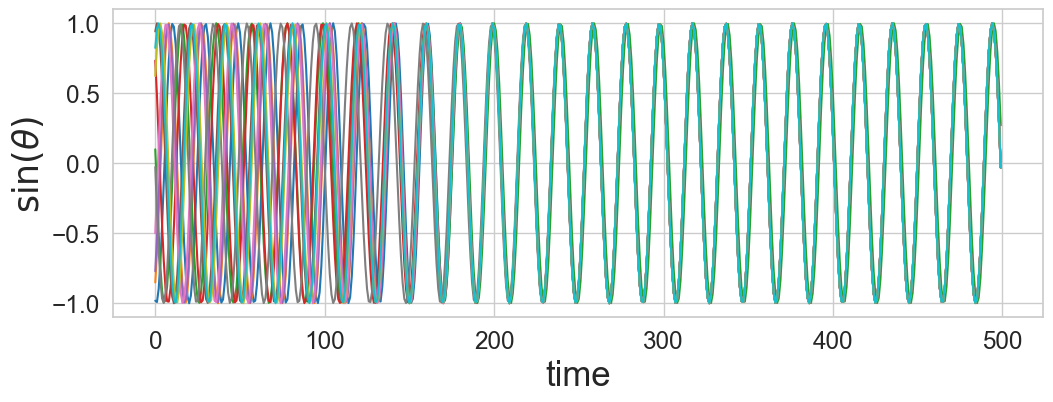

In [25]:
# Instantiate model with K=3 and w_i = freqs
test_model = Kuramoto(coupling=3, dt=0.01, T=5, natfreqs=freqs)

# Create a graph with all-to-all connectivity
graph_nx = nx.erdos_renyi_graph(n=len(freqs), p=1) # p=1 -> all-to-all connectivity
graph_test = nx.to_numpy_array(graph_nx)

# Run simulation - output is time series for all nodes (node vs time)
act_mat = test_model.run(adj_mat=graph_test)

result = np.sin(act_mat.T)
# Plot all the time series
plt.figure(figsize=(12, 4))
plt.plot(np.sin(act_mat.T))
plt.xlabel('time', fontsize=25)
plt.ylabel(r'$\sin(\theta)$', fontsize=25)

# Finding the synchrony over time of the trained model

<AxesSubplot: xlabel='Time', ylabel='Order parameter'>

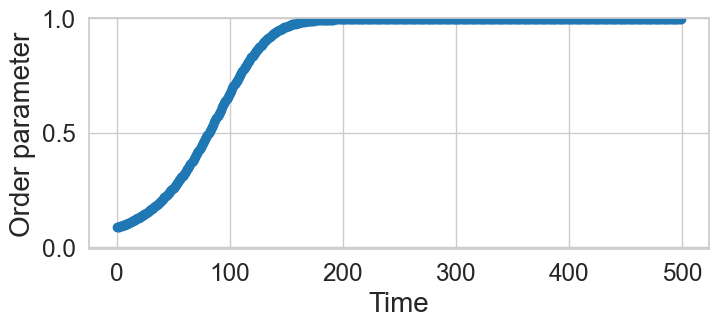

In [50]:
# Plot the order parameter
plot_phase_coherence(act_mat)

# Calculating the accuracy

In [95]:
# Plot the median of just the synchronous segment
osc_1 = []
for i in range(200,500):
    osc_1.append(np.median(result[i]))

# Find all the local maxima
maxima = find_peaks(osc_1)

flashes = []
for i in range(len(osc_1)):
    if i in list(maxima[0]):
        flashes.append(1)
    else:
        flashes.append(0)

accuracy = Model_Evaluation.compare(flashes, Model_Evaluation.exp_indexes)
print("Accuracy: ", accuracy)


Accuracy:  0.9667172227839569
